# Persistent Homology of Entanglement

## Generating a Random State to Analyze

The following code defines a function graph_state_circuit that takes an integer num_qubits as input and returns a quantum circuit representing a graph state. The graph state is created using a complete graph with num_qubits nodes. The quantum circuit is initialized with the given qubits, and Hadamard gates are applied to all qubits. Then, for each edge in the complete graph, random controlled unitary gates are applied using the qubits corresponding to the nodes of the edge.

Using random controlled unitaries as opposed to CNOT or controlled-Z gates for entangling qubits has several benefits:

1. Richer entanglement: Random controlled unitary gates can create a much richer variety of entangled states as they have more degrees of freedom compared to CNOT or controlled-Z gates. This can lead to a more diverse set of entangled states, which can be useful for quantum algorithms that rely on a broad range of entangled states for their operation.

2. Exploration of quantum state space: By using random controlled unitaries, you can explore a wider range of quantum states and their properties. This can be useful for studying the behavior of quantum systems and developing new quantum algorithms or protocols.

3. Benchmarking: Random controlled unitary gates can be useful for benchmarking and testing the performance of quantum computers. By generating a wide variety of quantum states and operations, you can evaluate the accuracy, fidelity, and robustness of quantum computers under different conditions.

In [1]:
pip install cirq qiskit gudhi -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
import networkx as nx
import numpy as np
import cirq
import numpy as np

def graph_state_circuit(num_qubits):
    """Returns a graph state circuit on num_qubits qubits"""
    # Generate a complete graph with num_qubits nodes
    graph = nx.complete_graph(num_qubits)

    # Initialize the circuit with the given qubits
    qubits = [cirq.LineQubit(i) for i in range(num_qubits)]
    circuit = cirq.Circuit()

    # Apply Hadamard gates to all qubits
    circuit.append(cirq.H.on_each(qubits))

    # Apply random controlled unitary gates to each edge
    for edge in graph.edges():
        control_qubit, target_qubit = qubits[edge[0]], qubits[edge[1]]

        # Generate a random unitary matrix
        random_unitary = cirq.testing.random_unitary(2)

        # Apply the controlled random unitary gate to the circuit
        circuit.append(cirq.ControlledGate(cirq.MatrixGate(random_unitary)).on(control_qubit, target_qubit))
        
    # Define number of qubits in circuit
    circuit.num_qubits = len(circuit.all_qubits())

    return circuit



In [3]:
num_qubits = 5
circuit = graph_state_circuit(num_qubits)
circuit

┌──────────────────────────────────────────────────────────┐   ┌──────────────────────────────────────────────────────────┐   ┌──────────────────────────────────────────────────────────┐
0: ───H───@───────────────────────────────@────────────────────────────────@──────────────────────────────────────────────────────────────@────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
          │                               │                                │                                                              │
          ┌                           ┐   │                                │                                                              │
1: ───H───│ 0.286+0.366j -0.747+0.476j│───┼────────────────────────────────┼────────────────────────────@─────────────────────────────────┼────────────────────────────@─────────────────────────────────@─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
          │ 0.024-0.886j -0.46 -0.057j│   │                                │                            │                                 │                            │                                 │
          └                           ┘   │                                │                            │                                 │                            │                                 │
                                          │                                │                            │                                 │                            │                                 │
                                          ┌                           ┐    │                            ┌                           ┐     │                            │                                 │
2: ───H───────────────────────────────────│-0.508-0.683j  0.485+0.203j│────┼────────────────────────────│-0.226-0.489j  0.724-0.43j │─────┼────────────────────────────┼─────────────────────────────────┼────────────────────────────@────────────────────────────────@───────────────────────────────────────────────────────────────
                                          │-0.258+0.458j  0.02 +0.851j│    │                            │-0.551+0.637j  0.442+0.309j│     │                            │                                 │                            │                                │
                                          └                           ┘    │                            └                           ┘     │                            │                                 │                            │                                │
                                                                           │                                                              │                            │                                 │                            │                                │
                                                                           ┌                           ┐                                  │                            ┌                           ┐     │                            ┌                           ┐    │
3: ───H────────────────────────────────────────────────────────────────────│ 0.645-0.289j -0.698+0.117j│──────────────────────────────────┼────────────────────────────│-0.626-0.497j  0.518+0.304j│─────┼────────────────────────────│ 0.131+0.647j  0.404+0.633j│────┼───────────────────────────────@───────────────────────────────
                                                                           │ 0.663+0.247j  0.579+0.406j│                                  │                            │ 0.071+0.596j  0.205+0.773j│     │                            │-0.212-0.72j   0.402+0.524j│    │                               │
                                                    

## Partition the Circuit by Time Steps (Moments)

In [4]:
import cirq

def partition_circuit_by_moments(circuit):
    moments = list(circuit)
    simulator = cirq.Simulator()

    state_vectors = []
    current_state = simulator.simulate(circuit)
    state_vectors.append(current_state.final_state_vector)

    for i in range(1, len(moments)):
        moment = moments[:i+1]
        partial_circuit = cirq.Circuit(moment)
        current_state = simulator.simulate(partial_circuit)
        state_vectors.append(current_state.final_state_vector)

    return state_vectors

In [5]:
partition_circuit_by_moments(circuit)

[array([ 0.17677668+0.j        ,  0.17677668+0.j        ,
        -0.01719587-0.07181169j,  0.16126888+0.17618093j,
         0.03938785+0.30444252j,  0.14631858-0.06844391j,
        -0.04250609+0.03837486j,  0.03676162+0.0062297j ,
         0.00860933+0.04753174j,  0.0178386 +0.0265326j ,
        -0.0915349 +0.1245842j ,  0.25652847-0.20872283j,
        -0.14807451+0.14655069j,  0.02950632+0.04383285j,
         0.08258665-0.15058093j, -0.19409321-0.00315536j,
         0.01759285+0.00713774j,  0.00571409+0.00614757j,
         0.02458704-0.02448216j, -0.12831968-0.09239849j,
         0.16744603+0.20498627j,  0.18414691-0.01555038j,
        -0.04873379-0.19637838j, -0.01386132+0.24163496j,
         0.19606489+0.20283082j,  0.05158753+0.00144885j,
        -0.07831102-0.16334718j, -0.18051624+0.20074666j,
        -0.2152036 +0.13799557j, -0.09269729+0.08292794j,
         0.00426714+0.0089589j ,  0.00603585-0.02697507j], dtype=complex64),
 array([ 0.17677668+0.j        ,  0.17677668+0.j     

Now, let's pick a single density matrix to run persistent homology analysis on, say the final one of the fully entangled system. In reality we would run the persistent homology analysis at each time step to obtain a bifiltration (on time parameter and one QMI parameter). 

In [6]:
rho = cirq.final_density_matrix(circuit)
rho.shape, rho

((32, 32),
 array([[ 3.1249994e-02+0.j        ,  3.1249994e-02+0.j        ,
         -3.0398292e-03+0.01269463j, ..., -1.6386719e-02-0.01465973j,
          7.5433037e-04-0.00158372j,  1.0669976e-03+0.00476856j],
        [ 3.1249994e-02+0.j        ,  3.1249994e-02+0.j        ,
         -3.0398292e-03+0.01269463j, ..., -1.6386719e-02-0.01465973j,
          7.5433037e-04-0.00158372j,  1.0669976e-03+0.00476856j],
        [-3.0398292e-03-0.01269463j, -3.0398292e-03-0.01269463j,
          5.4526171e-03+0.j        , ..., -4.3611852e-03+0.00808277j,
         -7.1673095e-04-0.00015237j,  1.8333340e-03-0.0008973j ],
        ...,
        [-1.6386719e-02+0.01465973j, -1.6386719e-02+0.01465973j,
         -4.3611852e-03-0.00808277j, ...,  1.5469832e-02+0.j        ,
          3.4739106e-04+0.00118433j, -2.7964944e-03-0.00199998j],
        [ 7.5433037e-04+0.00158372j,  7.5433037e-04+0.00158372j,
         -7.1673095e-04+0.00015237j, ...,  3.4739106e-04-0.00118433j,
          9.8470358e-05+0.j        , 

In [7]:
import numpy as np
from qiskit.quantum_info import partial_trace, entropy

def compute_inverse_mutual_information(rho):
    """
    Computes the inverse quantum mutual information for every pair of qubits in the input density matrix.

    Args:
        rho (numpy.ndarray): a 2^n x 2^n density matrix representing the state of n qubits.

    Returns:
        numpy.ndarray: an n x n matrix of inverse quantum mutual information values, where element i,j gives the inverse
        mutual information between qubits i and j.
    """
    # Determine the number of qubits n from the shape of rho.
    n = int(np.log2(rho.shape[0]))

    # Create an empty n x n matrix to store the inverse mutual information.
    inverse_mutual_information_matrix = np.zeros((n, n))

    # Loop over all pairs of qubits (i, j).
    for i in range(n):
        for j in range(i+1, n):

            # Define the indices of the qubits to trace out.
            trace_indices = [k for k in range(n) if k != i and k != j]

            # Trace out the other qubits to obtain the reduced density matrix of qubits i and j.
            rho_ij = partial_trace(rho, trace_indices)

            # Compute the von Neumann entropy of the reduced density matrix of qubit i.
            entropy_i = entropy(partial_trace(rho_ij, [1]))

            # Compute the von Neumann entropy of the reduced density matrix of qubit j.
            entropy_j = entropy(partial_trace(rho_ij, [0]))

            # Compute the mutual information between qubits i and j.
            qmi = entropy_i + entropy_j - entropy(rho_ij)

            # Compute the inverse mutual information between qubits i and j.
            inverse_mutual_information_matrix[i, j] = 2 * np.log(2) - qmi

    # Copy the upper triangular part of the matrix to the lower triangular part.
    inverse_mutual_information_matrix += inverse_mutual_information_matrix.T - np.diag(inverse_mutual_information_matrix.diagonal())

    return inverse_mutual_information_matrix



From each time step, we obtain a distance matrix given by the QMI between each pair of qubits. 

In [8]:
qmi_distance_matrix = compute_inverse_mutual_information(rho)
qmi_distance_matrix

array([[0.        , 0.78807745, 1.02891902, 1.14260209, 1.10831325],
       [0.78807745, 0.        , 1.05913347, 1.02872375, 0.91603157],
       [1.02891902, 1.05913347, 0.        , 0.74970747, 0.84043565],
       [1.14260209, 1.02872375, 0.74970747, 0.        , 0.86097188],
       [1.10831325, 0.91603157, 0.84043565, 0.86097188, 0.        ]])

## Persistent Homology Using Quantum Mutual Information

Quantum mutual information provides us with a distance metric which can be used to compute the persistent homology of quantum systems at arbitrary time steps. This filters a quantum circuit such as the one we have constructed in two ways. One filtration paramter is of course the quantum mutual information calculated between each pair of qubits. The second is the time parameter. Since the circuit is natrually divided into time steps, or moments, we can use this second parameter to construct a bifiltration of the quantum system. For bifiltrations and $2$-parameter persistent homology we can use [Rivet](https://rivet.readthedocs.io/en/latest/about.html). However, because the filtration into time steps is discretized already, we can simply apply one-parameter persistence to each time step to obtain the two-parameter persistent homology. 

In [9]:
import gudhi as gd

def persistent_homology(qmi_distance_matrix, dimension=1):
    """
    Computes the persistent homology for the QMI distance matrix.

    Args:
        qmi_distance_matrix (numpy.ndarray): An n x n QMI distance matrix.
        dimension (int): The maximum dimension for the simplices to compute persistent homology. Default is 1.

    Returns:
        list: A list of tuples representing the persistent homology. Each tuple contains two elements: the first
        element is the dimension of the feature, and the second element is a tuple representing the birth and death
        of the feature.
    """
    # Create a Rips complex from the QMI distance matrix
    rips_complex = gd.RipsComplex(distance_matrix=qmi_distance_matrix, max_edge_length=np.inf)

    # Create a simplex tree from the Rips complex
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=dimension)

    # Compute the persistent homology
    persistence = simplex_tree.persistence()

    return persistence


In [10]:
persistence = persistent_homology(qmi_distance_matrix)
persistence

[(0, (0.0, inf)),
 (0, (0.0, 0.9160315682072138)),
 (0, (0.0, 0.8404356502140578)),
 (0, (0.0, 0.7880774527006433)),
 (0, (0.0, 0.7497074667846957))]

In [11]:
import matplotlib.pyplot as plt

def plot_persistence_diagram(persistence):
    """
    Plots the persistence diagram for the given persistent homology.

    Args:
        persistence (list): A list of tuples representing the persistent homology.
    """
    gd.plot_persistence_diagram(persistence)
    plt.show()


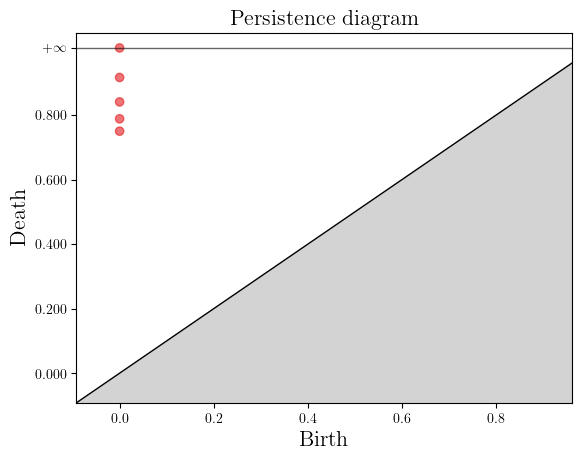

In [12]:
plot_persistence_diagram(persistence)

## A Version for Qiskit Only

In [13]:
import networkx as nx
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.extensions import UnitaryGate
from qiskit.quantum_info.random import random_unitary

def qiskit_graph_state_circuit(num_qubits):
    """Returns a graph state circuit on num_qubits qubits"""
    # Generate a random graph with num_qubits nodes
    graph = nx.complete_graph(num_qubits)

    # Initialize the circuit with the given qubits
    qubits = QuantumRegister(num_qubits)
    circuit = QuantumCircuit(qubits)

    # Apply Hadamard gates to all qubits
    circuit.h(qubits)

    # Apply random controlled unitary gates to each edge
    for edge in graph.edges():
        control_qubit, target_qubit = qubits[edge[0]], qubits[edge[1]]

        # Generate a random unitary matrix
        random_unitary_matrix = random_unitary(2).data

        # Apply the controlled random unitary gate to the circuit
        controlled_unitary_gate = UnitaryGate(random_unitary_matrix).control()
        circuit.append(controlled_unitary_gate, [control_qubit, target_qubit])

    # Define number of qubits in circuit
    # circuit.num_qubits = len(circuit.qubits)

    return circuit

In [14]:
num_qubits = 4
circuit2 = qiskit_graph_state_circuit(num_qubits)
circuit2.draw()

┌───┐                                                                  
q0_0: ┤ H ├─────■──────────■──────────■──────────────────────────────────────
      ├───┤┌────┴────┐     │          │                                      
q0_1: ┤ H ├┤ Unitary ├─────┼──────────┼──────────■──────────■────────────────
      ├───┤└─────────┘┌────┴────┐     │     ┌────┴────┐     │                
q0_2: ┤ H ├───────────┤ Unitary ├─────┼─────┤ Unitary ├─────┼──────────■─────
      ├───┤           └─────────┘┌────┴────┐└─────────┘┌────┴────┐┌────┴────┐
q0_3: ┤ H ├──────────────────────┤ Unitary ├───────────┤ Unitary ├┤ Unitary ├
      └───┘                      └─────────┘           └─────────┘└─────────┘

In [15]:
import numpy as np
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.quantum_info import DensityMatrix, partial_trace, entropy, state_fidelity

def quantum_mutual_information(rho, qubits):
    qubit_a, qubit_b = qubits
    rho_ab = partial_trace(rho, [k for k in range(rho.num_qubits) if k not in qubits])
    rho_a = partial_trace(rho_ab, [1])
    rho_b = partial_trace(rho_ab, [0])
    return entropy(rho_a) + entropy(rho_b) - entropy(rho_ab)

def inverse_quantum_mutual_information(rho, qubits):
    qmi = quantum_mutual_information(rho, qubits)
    return 2 * np.log(2) - qmi

def compute_pairwise_inverse_qmi(circuit):
    backend = Aer.get_backend('statevector_simulator')
    transpiled_circuit = transpile(circuit, backend)
    result = backend.run(transpiled_circuit).result()
    statevector = result.get_statevector()
    rho = DensityMatrix(statevector)

    n_qubits = circuit.num_qubits
    qubit_pairs = [(i, j) for i in range(n_qubits) for j in range(i + 1, n_qubits)]

    pairwise_inverse_qmi = {}
    for pair in qubit_pairs:
        pairwise_inverse_qmi[pair] = inverse_quantum_mutual_information(rho, pair)

    return pairwise_inverse_qmi

# Compute pairwise inverse quantum mutual information
pairwise_inverse_qmi = compute_pairwise_inverse_qmi(circuit2)
print(pairwise_inverse_qmi)


{(0, 1): 1.0923592883636215, (0, 2): 1.005621640552336, (0, 3): 0.9989473655351426, (1, 2): 1.091354070293765, (1, 3): 1.0624931685146983, (2, 3): 1.1000974432793191}


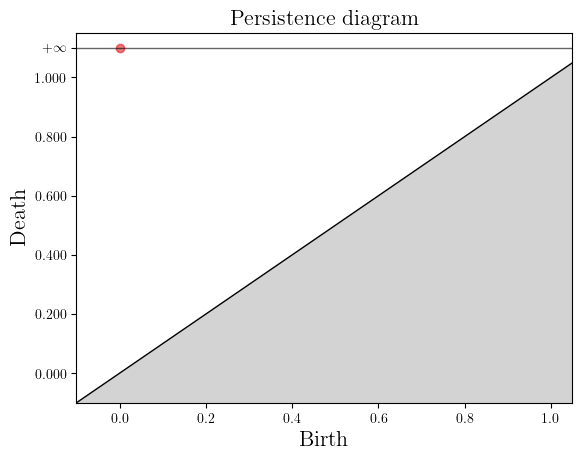

In [16]:
import numpy as np
import gudhi as gd
import matplotlib.pyplot as plt

def pairwise_inverse_qmi_matrix(pairwise_inverse_qmi, n_qubits):
    matrix = np.zeros((n_qubits, n_qubits))
    for (i, j), value in pairwise_inverse_qmi.items():
        matrix[i, j] = value
        matrix[j, i] = value
    return matrix

def compute_persistent_homology(pairwise_inverse_qmi_matrix):
    # Create a Rips complex using the distance matrix
    rips_complex = gd.RipsComplex(distance_matrix=pairwise_inverse_qmi_matrix, max_edge_length=np.inf)

    # Create a simplex tree and compute the persistent homology
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    persistence = simplex_tree.persistence()

    return persistence

def plot_persistence_diagram(persistence):
    gd.plot_persistence_diagram(persistence)
    plt.show()

# Compute pairwise inverse quantum mutual information matrix
n_qubits = circuit.num_qubits
pairwise_inverse_qmi_matrix = pairwise_inverse_qmi_matrix(pairwise_inverse_qmi, n_qubits)

# Compute persistent homology
persistence = compute_persistent_homology(pairwise_inverse_qmi_matrix)

# Plot the persistence diagram
plot_persistence_diagram(persistence)


## Comparing Persistent Homology

Suppose we would like to use persistent homology to compare the entanglement structure of two different systems. We can use the Wasserstein or Bottleneck distances in order to do so. So, for example, we can observe how much the persistent homology changes from one time step to another, providing insight into what time steps introduct significant topological features. For example, suppose one of the entangling gates introduced significantly more entanglement than the others. This would result in a QMI outlier that would result in an edge that persists for longer than other edges in the simplicial complex. We can view this in the interaction graph (with edges colored by how strong the QMI is) or in the simplicial complexes and their corresponding persistence diagrams. Comparing this time step with others results in a larger Wasserstein or Bottleneck distance between the current time step and the previous time step. 